# Loading a Pre-Trained Word Embeddings Model
Use for example this GoogleNews


In [ ]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format("datasets/first-steps/GoogleNews-vectors-negative300.bin.gz", binary=True)

## Play a Bit With Gensim

In [ ]:
type(model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [ ]:
len(model.index2entity)

3000000

In [ ]:
model.vocab["cat"].index

5947

In [ ]:
len(model['cat'])

300

In [ ]:
model["cat"]

array([ 0.0123291 ,  0.20410156, -0.28515625,  0.21679688,  0.11816406,
        0.08300781,  0.04980469, -0.00952148,  0.22070312, -0.12597656,
        0.08056641, -0.5859375 , -0.00445557, -0.296875  , -0.01312256,
       -0.08349609,  0.05053711,  0.15136719, -0.44921875, -0.0135498 ,
        0.21484375, -0.14746094,  0.22460938, -0.125     , -0.09716797,
        0.24902344, -0.2890625 ,  0.36523438,  0.41210938, -0.0859375 ,
       -0.07861328, -0.19726562, -0.09082031, -0.14160156, -0.10253906,
        0.13085938, -0.00346375,  0.07226562,  0.04418945,  0.34570312,
        0.07470703, -0.11230469,  0.06738281,  0.11230469,  0.01977539,
       -0.12353516,  0.20996094, -0.07226562, -0.02783203,  0.05541992,
       -0.33398438,  0.08544922,  0.34375   ,  0.13964844,  0.04931641,
       -0.13476562,  0.16308594, -0.37304688,  0.39648438,  0.10693359,
        0.22167969,  0.21289062, -0.08984375,  0.20703125,  0.08935547,
       -0.08251953,  0.05957031,  0.10205078, -0.19238281, -0.09

In [ ]:
linreg = model['king'] - model['man'] + model['woman']
linreg

array([ 4.29687500e-02, -1.78222656e-01, -1.29089355e-01,  1.15234375e-01,
        2.68554688e-03, -1.02294922e-01,  1.95800781e-01, -1.79504395e-01,
        1.95312500e-02,  4.09919739e-01, -3.68164062e-01, -3.96484375e-01,
       -1.56738281e-01,  1.46484375e-03, -9.30175781e-02, -1.16455078e-01,
       -5.51757812e-02, -1.07574463e-01,  7.91015625e-02,  1.98974609e-01,
        2.38525391e-01,  6.34002686e-02, -2.17285156e-02,  0.00000000e+00,
        4.72412109e-02, -2.17773438e-01, -3.44726562e-01,  6.37207031e-02,
        3.16406250e-01, -1.97631836e-01,  8.59375000e-02, -8.11767578e-02,
       -3.71093750e-02,  3.15551758e-01, -3.41796875e-01, -4.68750000e-02,
        9.76562500e-02,  8.39843750e-02, -9.71679688e-02,  5.17578125e-02,
       -5.00488281e-02, -2.20947266e-01,  2.29492188e-01,  1.26403809e-01,
        2.49023438e-01,  2.09960938e-02, -1.09863281e-01,  5.81054688e-02,
       -3.35693359e-02,  1.29577637e-01,  2.41699219e-02,  3.48129272e-02,
       -2.60009766e-01,  

In [ ]:
model.similar_by_vector(linreg, topn=10)

[('king', 0.8449392318725586),
 ('queen', 0.7300516963005066),
 ('monarch', 0.6454660892486572),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663196563721),
 ('sultan', 0.5376776456832886),
 ('Queen_Consort', 0.5344248414039612),
 ('queens', 0.5289887189865112)]

In [ ]:
model.similarity('cat', 'dog')

0.76094574

In [ ]:
model.similarity('laptop', 'pen')

0.2622803

In [ ]:
model.most_similar(positive='computer', topn=10)

[('computers', 0.7979379892349243),
 ('laptop', 0.6640493273735046),
 ('laptop_computer', 0.6548868417739868),
 ('Computer', 0.6473335027694702),
 ('com_puter', 0.6082080006599426),
 ('technician_Leonard_Luchko', 0.5662748217582703),
 ('mainframes_minicomputers', 0.5617721080780029),
 ('laptop_computers', 0.5585449934005737),
 ('PC', 0.5539618134498596),
 ('maker_Dell_DELL.O', 0.5519254207611084)]

# Creating a Word Embeddings Model
Create a new word embeddings model using the CharCnn_Keras dataset. Importing the csv data with [panda's read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table).

## Preparing the Input Data
Accessing DataFrame's columns and combining them to create a new corpus.

In [ ]:
import pandas as pd
colnames = ['class', 'text', 'description']
# The csv has no header row therefore header=None
df = pd.read_csv('datasets/first-steps/charcnn_keras.csv', header=None, names=colnames)
df['text'] = df['text'].astype(pd.StringDtype())
# Join the description column on the text column
df['text'] = df['text'].str.cat(df['description'], sep=" ")
# Remove the description column
df = df[['class', 'text']]
# Replace double slashes with a space
df['text'] = df['text'].str.replace("\\", " ")
df

,class,text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."
...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...
119996,2,Renteria signing a top-shelf deal Red Sox gene...
119997,2,Saban not going to Dolphins yet The Miami Dolp...
119998,2,Today's NFL games PITTSBURGH at NY GIANTS Time...


In [ ]:
df.loc[0]['text'] # get first item in pandas series

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again."

[Working with text data in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html). Further text processing steps. Using generators (map) for better performance instead of something like [pandas.Series.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html).

In [ ]:
import nltk

df['text'] = df['text'].str.lower()
# tokenize the words
df['text'] = df['text'].map(nltk.word_tokenize)
# remove punctuation characters
punctuation = list('()-,.')
df['text'] = df['text'].map(lambda tokens: [token for token in tokens if token not in punctuation])
# TODO: single occurence words
# TODO: try different models with different word occurence thresholds
df

,class,text
0,3,"[wall, st., bears, claw, back, into, the, blac..."
1,3,"[carlyle, looks, toward, commercial, aerospace..."
2,3,"[oil, and, economy, cloud, stocks, ', outlook,..."
3,3,"[iraq, halts, oil, exports, from, main, southe..."
4,3,"[oil, prices, soar, to, all-time, record, posi..."
...,...,...
119995,1,"[pakistan, 's, musharraf, says, wo, n't, quit,..."
119996,2,"[renteria, signing, a, top-shelf, deal, red, s..."
119997,2,"[saban, not, going, to, dolphins, yet, the, mi..."
119998,2,"[today, 's, nfl, games, pittsburgh, at, ny, gi..."


In [ ]:
df.loc[0]['text'] # get first item in pandas series

['wall',
 'st.',
 'bears',
 'claw',
 'back',
 'into',
 'the',
 'black',
 'reuters',
 'reuters',
 'short-sellers',
 'wall',
 'street',
 "'s",
 'dwindling',
 'band',
 'of',
 'ultra-cynics',
 'are',
 'seeing',
 'green',
 'again']

## Training a New Gensim Model

In [ ]:
import gensim.models
model2 = gensim.models.Word2Vec(sentences=pdocs,size=150,window=3)

In [ ]:
man = model2.wv['man']
man

array([ 3.2509055e-03, -2.8211824e-03,  2.1064635e-03,  4.5263578e-04,
       -1.8984306e-03, -9.5855509e-04, -2.5109819e-03,  2.0845050e-03,
       -1.4815198e-03,  1.2566762e-03,  2.9971008e-03,  1.0236441e-03,
        3.1448288e-03,  2.4817209e-03,  1.4293914e-03, -2.9565513e-03,
       -3.1111999e-03,  3.3179009e-03, -5.6394364e-04, -2.9374827e-03,
        2.1319862e-03, -1.6192439e-03,  9.9124084e-04,  9.1488229e-04,
       -7.8270171e-04, -2.8831763e-03,  5.1643484e-04,  3.1044246e-03,
        2.6008254e-03, -1.5203892e-03, -1.2993389e-03, -1.8539869e-03,
       -2.4088188e-03, -1.5159698e-03,  2.5969599e-03,  1.4008279e-03,
        2.7841676e-03, -2.9522758e-03, -1.3177737e-03, -1.8715435e-04,
       -1.3875922e-03, -1.7583688e-03, -1.6335399e-03,  2.9081446e-03,
        4.2877040e-05, -2.9368999e-03,  1.2899737e-03, -1.5002734e-03,
        4.7450754e-04,  2.8122670e-03, -3.0747617e-03,  1.6120430e-03,
        1.6610948e-03, -1.5994621e-03,  9.9547533e-04,  8.6759072e-04,
      

In [ ]:
len(man)

150

In [ ]:
linreg2 = model2.wv['king'] - model2.wv['man'] + model2.wv['woman']
linreg2

array([-4.5831362e-04,  1.7943901e-03, -1.0849633e-03,  3.6658281e-03,
       -1.9438170e-03,  1.8894003e-03,  4.8327614e-03,  6.8830402e-04,
       -2.4006120e-04, -1.1913328e-03, -2.8672214e-03, -2.2891238e-03,
       -8.9808200e-03, -6.8256971e-03, -4.5325798e-03,  2.5954146e-03,
        6.2398138e-03,  2.3849374e-03, -3.1278231e-03,  2.4854522e-03,
       -1.3595591e-03,  6.3375956e-03,  2.3039354e-03, -2.4595552e-03,
        3.4993282e-03, -1.8384317e-03, -4.3743346e-03, -8.4173083e-03,
        2.7702504e-04,  6.2006479e-03,  9.9041546e-04,  1.8551780e-03,
        7.5399885e-03,  1.3509777e-04,  1.7374707e-04, -1.4108573e-03,
       -2.8678887e-03,  6.0379244e-03,  3.7507899e-03,  1.8262832e-03,
        6.1136112e-04,  1.6130289e-03,  5.4569445e-03, -2.0520685e-03,
        4.4538814e-04, -3.1106679e-03, -9.1901864e-04, -1.5878899e-03,
       -1.6523319e-03, -8.2760239e-03,  2.1716573e-03, -4.1763554e-04,
        1.2504752e-05, -5.2194705e-04, -3.4555881e-03, -4.3756757e-03,
      

In [ ]:
model2.wv.similar_by_vector(linreg2, topn=5)

[('king', 0.6251064538955688),
 ('woman', 0.5951869487762451),
 ('groundless', 0.34853577613830566),
 ('yale', 0.33714425563812256),
 ('oversupply', 0.3125631809234619)]

In [ ]:
model2.wv.similarity('cat', 'dog')

0.106377944

In [ ]:
model2.wv.similarity('laptop', 'pen')

0.0090275165

In [ ]:
model2.wv.most_similar(positive='computer', topn=10)

[('hispanics', 0.3065454363822937),
 ('9.', 0.29615408182144165),
 ('fernandes', 0.2893978953361511),
 ('bitter', 0.286759614944458),
 ('rochester', 0.28672346472740173),
 ('probe', 0.28386253118515015),
 ('arvinmeritor', 0.2830011248588562),
 ('cameras', 0.28089964389801025),
 ('adelaide', 0.27515557408332825),
 ('101-89', 0.2722257375717163)]

In [ ]:
model2.wv.most_similar(positive='well', topn=10)

[('posh', 0.37937071919441223),
 ('escape', 0.3036438822746277),
 ('bellwethers', 0.29790356755256653),
 ('big-box', 0.29750657081604004),
 ('hostagesa', 0.29717475175857544),
 ('molyneux', 0.2963765263557434),
 ('lasers', 0.2927957773208618),
 ('involve', 0.28801554441452026),
 ('amend', 0.28691235184669495),
 ('ailing', 0.28640615940093994)]

In [ ]:
model2.wv['tree']

array([ 1.1479368e-03, -2.4079403e-03, -4.9619010e-04,  1.5037350e-03,
        1.3790226e-03, -1.1881487e-03,  1.5467856e-03, -2.4782766e-03,
        2.0045780e-03,  2.6837839e-03,  8.9596020e-04,  2.0545612e-04,
        3.3361419e-05, -3.2280125e-03,  2.1660682e-04,  1.8908661e-03,
       -2.7937668e-03, -9.1295701e-04,  1.2244526e-03, -1.7019815e-03,
        1.1126240e-04, -1.1412264e-03, -1.6519691e-04,  1.0293021e-03,
       -1.6817378e-03, -8.8374567e-04, -3.1548322e-03,  3.0989235e-03,
        1.6921433e-03, -8.7498724e-05,  1.8064344e-04,  4.5123208e-05,
        1.4353594e-03,  1.4449963e-03, -2.6342510e-03, -3.4319999e-04,
       -6.8458990e-04, -3.0170439e-03,  9.9217659e-04, -2.7559176e-03,
       -2.3012394e-04,  7.4092677e-04, -2.5331182e-04, -1.8785077e-03,
       -2.5004339e-03, -3.1861113e-03, -1.5018584e-03,  1.3704825e-03,
        3.1138228e-03,  2.4719043e-03, -1.7110386e-03, -1.0245235e-03,
        1.4564411e-03,  1.6948051e-03,  3.1315188e-03,  2.4516005e-03,
      

# Setup a Simple Deep Learning Classifier using Keras



## See How the Embedding Layer Works
[Embedding layer](https://keras.io/api/layers/core_layers/embedding/)

In [ ]:
import keras

embedding_layer = model.get_keras_embedding(train_embeddings=False)
basic_keras_model = keras.models.Sequential(
    [
        embedding_layer
    ]
)
basic_keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Check if the keras predicted vector is equal to the real vector

In [ ]:
my_words = "cat dog".split()
my_words_id = [model.vocab[word].index for word in my_words]

cat_id = my_words_id[my_words.index("cat")]

keras_predicted = basic_keras_model.predict([cat_id])[0,0] # id for cat
(model["cat"] == keras_predicted).all()

True

In [ ]:
dog_id = my_words_id[my_words.index("dog")]

basic_keras_model.predict([cat_id, dog_id])[0,0]

## Prepare the Data Set
Only use instances where the class is either 3 or 4.

In [ ]:
import keras
import numpy as np

INPUT_LENGTH = 100
VALIDATION_SPLIT = 0.2

def to_token_id(tokens):
    return [model.vocab[token].index for token in tokens if token in model.vocab]

# choose elements with class 3 or 4
df = df[(df['class'] == 3) | (df['class'] == 4)]

labels = df['class'].to_numpy()
labels[labels == 3] = 0
labels[labels == 4] = 1

data = df['text'].apply(to_token_id)
# make sequences same length
data = keras.preprocessing.sequence.pad_sequences(data, maxlen=INPUT_LENGTH)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

Using TensorFlow backend.


Look at the shape of the data set



In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((48000, 100), (48000,), (12000, 100), (12000,))

In [ ]:
sum(y_train)

23998

In [ ]:
sum(y_val)

6002

## Train a Classifier Model

In [ ]:
input_dim = x_train.shape[1]

embedding_layer = model.get_keras_embedding(train_embeddings=False)
embedding_layer.input_length = INPUT_LENGTH

classifier_keras_model = keras.models.Sequential(
    [
        embedding_layer,
        keras.layers.Dense(units=16, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=1, activation='sigmoid'),
    ]
)

classifier_keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier_keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
dense_1 (Dense)              (None, 100, 8)            2408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 801       
Total params: 900,003,209
Trainable params: 3,209
Non-trainable params: 900,000,000
_________________________________________________________________


In [ ]:
history = classifier_keras_model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 255us/step - loss: 0.2066 - accuracy: 0.9205 - val_loss: 0.2486 - val_accuracy: 0.9051
Epoch 2/10
48000/48000 [==============================] - 12s 241us/step - loss: 0.1992 - accuracy: 0.9244 - val_loss: 0.2499 - val_accuracy: 0.9047
Epoch 3/10
48000/48000 [==============================] - 12s 246us/step - loss: 0.1921 - accuracy: 0.9259 - val_loss: 0.2517 - val_accuracy: 0.9043
Epoch 4/10
48000/48000 [==============================] - 12s 245us/step - loss: 0.1865 - accuracy: 0.9285 - val_loss: 0.2554 - val_accuracy: 0.9033
Epoch 5/10
48000/48000 [==============================] - 12s 243us/step - loss: 0.1808 - accuracy: 0.9308 - val_loss: 0.2622 - val_accuracy: 0.9018
Epoch 6/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.1770 - accuracy: 0.9325 - val_loss: 0.2625 - val_accuracy: 0.8985
Epoch 7/10
48000/48000 [==============================] 

In [ ]:
classifier_keras_model.save('models/first-steps/classifier(inputl 30, l1units 16, epochs 10, batch_s 10)')

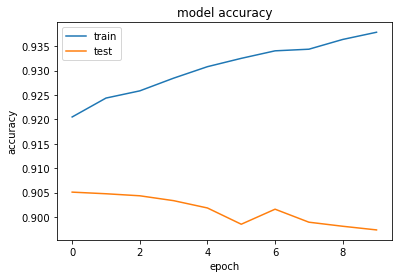

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
text1 = df['text'].loc[0]
text1 = to_token_id(text1)
text1 = keras.preprocessing.sequence.pad_sequences([text1], maxlen=INPUT_LENGTH)
text1

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,  2334,  7590, 22993,    95,    69,    11,   987,
        62605, 62605,  2334,  1482, 14260,  1493,    19,  1642,  1516,
          333]])

In [ ]:
classifier_keras_model.predict(text1)

array([[0.52227056]], dtype=float32)

## Train Model with Updated Parameters

In [ ]:
import keras

embedding_layer = model.get_keras_embedding(train_embeddings=False)
embedding_layer.input_length = INPUT_LENGTH

classifier2 = keras.Sequential(
    [
        embedding_layer,
        keras.layers.Dense(units=8, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=1, activation='sigmoid'),
    ]
)
classifier2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
dense_1 (Dense)              (None, 100, 8)            2408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 801       
Total params: 900,003,209
Trainable params: 3,209
Non-trainable params: 900,000,000
_________________________________________________________________


In [ ]:
history2 = classifier2.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 514us/step - loss: 0.2909 - accuracy: 0.8827 - val_loss: 0.2647 - val_accuracy: 0.8965
Epoch 2/10
48000/48000 [==============================] - 11s 230us/step - loss: 0.2469 - accuracy: 0.9035 - val_loss: 0.2448 - val_accuracy: 0.9056
Epoch 3/10
48000/48000 [==============================] - 10s 207us/step - loss: 0.2353 - accuracy: 0.9088 - val_loss: 0.2411 - val_accuracy: 0.9082
Epoch 4/10
48000/48000 [==============================] - 10s 210us/step - loss: 0.2273 - accuracy: 0.9120 - val_loss: 0.2441 - val_accuracy: 0.9038
Epoch 5/10
48000/48000 [==============================] - 10s 214us/step - loss: 0.2207 - accuracy: 0.9151 - val_loss: 0.2432 - val_accuracy: 0.9054
Epoch 6/10
48000/48000 [==============================] - 11s 223us/step - loss: 0.2160 - accuracy: 0.9164 - val_loss: 0.2415 - val_accuracy: 0.9079
Epoch 7/10
48000/48000 [==============================] 

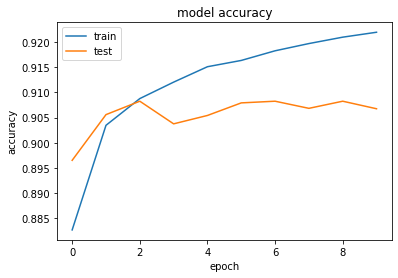

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history3 = classifier2.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_val, y_val), batch_size=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 222us/step - loss: 0.2021 - accuracy: 0.9226 - val_loss: 0.2430 - val_accuracy: 0.9073
Epoch 2/20
48000/48000 [==============================] - 11s 235us/step - loss: 0.2003 - accuracy: 0.9236 - val_loss: 0.2450 - val_accuracy: 0.9078
Epoch 3/20
48000/48000 [==============================] - 11s 229us/step - loss: 0.1989 - accuracy: 0.9248 - val_loss: 0.2453 - val_accuracy: 0.9057
Epoch 4/20
48000/48000 [==============================] - 10s 218us/step - loss: 0.1969 - accuracy: 0.9240 - val_loss: 0.2526 - val_accuracy: 0.9015
Epoch 5/20
48000/48000 [==============================] - 10s 217us/step - loss: 0.1953 - accuracy: 0.9259 - val_loss: 0.2534 - val_accuracy: 0.9057
Epoch 6/20
48000/48000 [==============================] - 11s 220us/step - loss: 0.1945 - accuracy: 0.9263 - val_loss: 0.2668 - val_accuracy: 0.8964
Epoch 7/20
48000/48000 [==============================] 

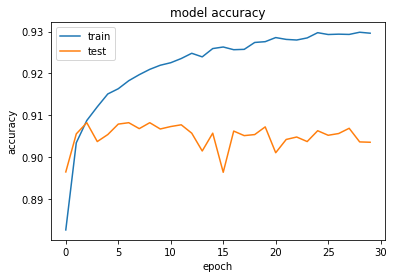

In [ ]:
plt.plot(history2.history['accuracy'] + history3.history['accuracy'])
plt.plot(history2.history['val_accuracy'] + history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Train Model with Updated Parameters (Again)

In [ ]:
import keras

embedding_layer.input_length = INPUT_LENGTH

classifier3 = keras.Sequential(
    [
        embedding_layer,
        keras.layers.Dense(units=10, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=1, activation='sigmoid'),
    ]
)
classifier3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
dense_22 (Dense)             (None, 100, 10)           3010      
_________________________________________________________________
flatten_12 (Flatten)         (None, 1000)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 1001      
Total params: 900,004,011
Trainable params: 4,011
Non-trainable params: 900,000,000
_________________________________________________________________


In [ ]:
history4 = classifier3.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_val, y_val), batch_size=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 9s 180us/step - loss: 0.3017 - accuracy: 0.8794 - val_loss: 0.2627 - val_accuracy: 0.8996
Epoch 2/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.2482 - accuracy: 0.9037 - val_loss: 0.2459 - val_accuracy: 0.9082
Epoch 3/20
48000/48000 [==============================] - 9s 187us/step - loss: 0.2354 - accuracy: 0.9091 - val_loss: 0.2437 - val_accuracy: 0.9057
Epoch 4/20
48000/48000 [==============================] - 9s 182us/step - loss: 0.2274 - accuracy: 0.9128 - val_loss: 0.2429 - val_accuracy: 0.9077
Epoch 5/20
48000/48000 [==============================] - 8s 170us/step - loss: 0.2209 - accuracy: 0.9141 - val_loss: 0.2377 - val_accuracy: 0.9108
Epoch 6/20
48000/48000 [==============================] - 8s 176us/step - loss: 0.2150 - accuracy: 0.9169 - val_loss: 0.2396 - val_accuracy: 0.9104
Epoch 7/20
48000/48000 [==============================] - 8s 1

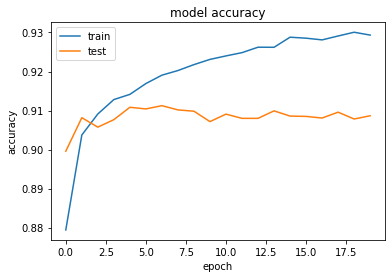

In [ ]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Creating a LSTM Model

In [ ]:
import keras

embedding_layer.input_length = INPUT_LENGTH

lstm_classifier = keras.Sequential(
    [
        embedding_layer,
        keras.layers.LSTM(100),
        keras.layers.Dense(units=1, activation='sigmoid'),
    ]
)
lstm_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_classifier.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 101       
Total params: 900,160,501
Trainable params: 160,501
Non-trainable params: 900,000,000
_________________________________________________________________


In [ ]:
history5 = lstm_classifier.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_val, y_val), batch_size=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 195s 4ms/step - loss: 0.2638 - accuracy: 0.8952 - val_loss: 0.2533 - val_accuracy: 0.8992
Epoch 2/5
48000/48000 [==============================] - 187s 4ms/step - loss: 0.2225 - accuracy: 0.9106 - val_loss: 0.2176 - val_accuracy: 0.9122
Epoch 3/5
48000/48000 [==============================] - 186s 4ms/step - loss: 0.1961 - accuracy: 0.9227 - val_loss: 0.2044 - val_accuracy: 0.9164
Epoch 4/5
48000/48000 [==============================] - 182s 4ms/step - loss: 0.1736 - accuracy: 0.9319 - val_loss: 0.2067 - val_accuracy: 0.9182
Epoch 5/5
48000/48000 [==============================] - 193s 4ms/step - loss: 0.1507 - accuracy: 0.9415 - val_loss: 0.2247 - val_accuracy: 0.9153


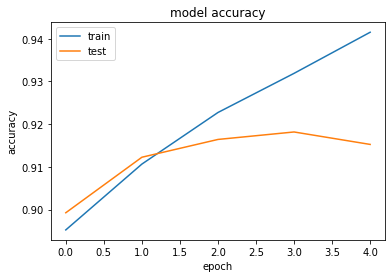

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Multi-label Classifier

## Prepare the Data Set

In [ ]:
import keras
import numpy as np

INPUT_LENGTH = 100
VALIDATION_SPLIT = 0.2
CLASS_COUNT = 4

def to_token_id(tokens):
    return [model.vocab[token].index for token in tokens if token in model.vocab]

labels = df['class'].to_numpy()
# get one-hot encoding for each label
labels = np.eye(CLASS_COUNT, dtype=int)[labels - 1]

data = df['text'].apply(to_token_id)
# make sequences same length
data = keras.preprocessing.sequence.pad_sequences(data, maxlen=INPUT_LENGTH)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

# randomize the dataset
data = data[indices]
labels = labels[indices]

train_count = int((1 - VALIDATION_SPLIT) * data.shape[0])
val_count = data.shape[0] - train_count

# get the train and validation indices for the original dataset
train_indices = np.zeros((CLASS_COUNT, train_count // CLASS_COUNT), dtype=int)
val_indices = np.zeros((CLASS_COUNT, val_count // CLASS_COUNT), dtype=int)
for cls_id in range(0, CLASS_COUNT):
    class_indices = np.arange(data.shape[0])[labels[:, cls_id] == 1]
    train_indices[cls_id] = class_indices[:(train_count // 4)]
    val_indices[cls_id] = class_indices[(train_count // 4):]

train_indices = train_indices.flatten()
val_indices = val_indices.flatten()

# set the data
# [x, x, x, x, x, x, x, x, o, o]
x_train = data[train_indices]
y_train = labels[train_indices]
# [o, o, o, o, o, o, o, o, x, x]
x_val = data[val_indices]
y_val = labels[val_indices]

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((96000, 100), (96000, 4), (24000, 100), (24000, 4))

Check and see if the dataset is class-wise balanced.

In [ ]:
y_train[y_train[:,0] == 1].shape[0],y_train[y_train[:,1] == 1].shape[0],y_train[y_train[:,2] == 1].shape[0],y_train[y_train[:,3] == 1].shape[0]

(24000, 24000, 24000, 24000)

## Training a simple multi-class classifier



In [ ]:
import keras

embedding_layer = model.get_keras_embedding(train_embeddings=False)
embedding_layer.input_length = INPUT_LENGTH

classifier = keras.Sequential(
    [
        embedding_layer,
        keras.layers.Dense(units=8, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=4, activation='sigmoid'),
    ]
)
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
dense_1 (Dense)              (None, 100, 8)            2408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 3204      
Total params: 900,005,612
Trainable params: 5,612
Non-trainable params: 900,000,000
_________________________________________________________________


In [ ]:
history = classifier.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), batch_size=10)

Train on 96000 samples, validate on 24000 samples
Epoch 1/10
96000/96000 [==============================] - 29s 302us/step - loss: 0.1784 - accuracy: 0.9334 - val_loss: 0.1576 - val_accuracy: 0.9438
Epoch 2/10
96000/96000 [==============================] - 21s 223us/step - loss: 0.1515 - accuracy: 0.9454 - val_loss: 0.1554 - val_accuracy: 0.9445
Epoch 3/10
96000/96000 [==============================] - 22s 230us/step - loss: 0.1468 - accuracy: 0.9472 - val_loss: 0.1545 - val_accuracy: 0.9453
Epoch 4/10
96000/96000 [==============================] - 21s 217us/step - loss: 0.1439 - accuracy: 0.9483 - val_loss: 0.1529 - val_accuracy: 0.9456
Epoch 5/10
96000/96000 [==============================] - 21s 222us/step - loss: 0.1419 - accuracy: 0.9491 - val_loss: 0.1537 - val_accuracy: 0.9453
Epoch 6/10
96000/96000 [==============================] - 21s 222us/step - loss: 0.1407 - accuracy: 0.9497 - val_loss: 0.1552 - val_accuracy: 0.9465
Epoch 7/10
96000/96000 [==============================] 

In [ ]:
classifier.predict(x_val)

array([[6.9953315e-02, 8.0309021e-01, 1.2928697e-02, 7.2692134e-03],
       [6.5907292e-02, 6.5971084e-04, 6.5825272e-01, 4.2944425e-03],
       [1.6920939e-03, 9.8646462e-01, 5.4964494e-02, 1.8512663e-02],
       ...,
       [3.2576029e-03, 2.2872604e-05, 2.8810802e-01, 9.0000981e-01],
       [3.4340855e-02, 9.7785795e-01, 5.6096693e-03, 1.6007683e-04],
       [6.4397953e-02, 6.8207141e-03, 3.2071859e-02, 5.0870174e-01]],
      dtype=float32)

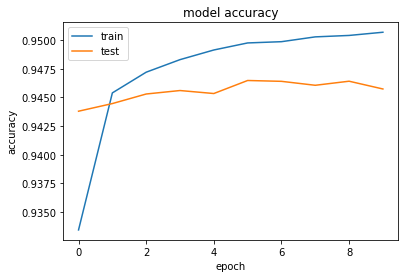

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

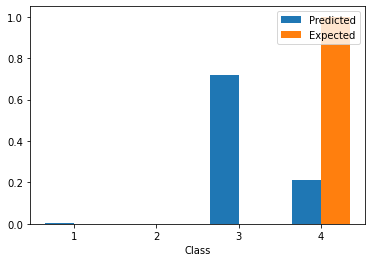

In [ ]:
index = np.random.choice(np.arange(y_val.shape[0]))

predicted = classifier.predict(np.array([x_val[index]])).reshape(-1)
expected = y_val[index]

w = 0.35
x = np.arange(CLASS_COUNT)
plt.bar(x - w/2, predicted, w, label='Predicted')
plt.bar(x + w/2, expected, w, label='Expected')
plt.xlabel('Class')
plt.xticks(x, (1,2,3,4))
plt.legend(loc='upper right')
plt.show()

In [ ]:
np.sum(predicted)

1.0335478

In [ ]:
predicted

array([2.6143305e-05, 1.2914099e-07, 1.0200993e-01, 9.8976570e-01],
      dtype=float32)

## Training a multi-class multi-label classifier


In [ ]:
import keras

embedding_layer = model.get_keras_embedding(train_embeddings=False)
embedding_layer.input_length = INPUT_LENGTH

## THIS IS NOT A MULTI-LABEL CLASSIFIER
classifier = keras.Sequential(
    [
        embedding_layer,
        keras.layers.Dense(units=8, activation='relu'),
        keras.layers.Flatten(),
        keras.layers.Dense(units=4, activation='sigmoid'),
    ]
)
classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 300)          900000000 
_________________________________________________________________
dense_3 (Dense)              (None, 100, 8)            2408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 3204      
Total params: 900,005,612
Trainable params: 5,612
Non-trainable params: 900,000,000
_________________________________________________________________


with multiple classifiers

In [ ]:
import keras
import numpy as np

INPUT_LENGTH = 100
VALIDATION_SPLIT = 0.2
CLASS_COUNT = 4

def to_token_id(tokens):
    return [model.vocab[token].index for token in tokens if token in model.vocab]

labels = df['class'].to_numpy()
# get one-hot encoding for each label
labels = np.eye(CLASS_COUNT, dtype=int)[labels - 1]

data = df['text'].apply(to_token_id)
# make sequences same length
data = keras.preprocessing.sequence.pad_sequences(data, maxlen=INPUT_LENGTH)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

# randomize the dataset
data = data[indices]
labels = labels[indices]

train_count = int((1 - VALIDATION_SPLIT) * data.shape[0])
val_count = data.shape[0] - train_count

# get the train and validation indices for the original dataset
train_indices = np.zeros((CLASS_COUNT, train_count // CLASS_COUNT), dtype=int)
val_indices = np.zeros((CLASS_COUNT, val_count // CLASS_COUNT), dtype=int)
for cls_id in range(0, CLASS_COUNT):
    class_indices = np.arange(data.shape[0])[labels[:, cls_id] == 1]
    train_indices[cls_id] = class_indices[:(train_count // 4)]
    val_indices[cls_id] = class_indices[(train_count // 4):]

train_indices = train_indices.flatten()
val_indices = val_indices.flatten()

# set the data
# [x, x, x, x, x, x, x, x, o, o]
x_train = data[train_indices]
y_train = labels[train_indices]
# [o, o, o, o, o, o, o, o, x, x]
x_val = data[val_indices]
y_val = labels[val_indices]

In [ ]:
import keras

embedding_layer = model.get_keras_embedding(train_embeddings=False)
embedding_layer.input_length = INPUT_LENGTH

classifiers = [] * CLASS_COUNT
histories = [] * CLASS_COUNT
for i in range(CLASS_COUNT):
    classifiers[i] = classifier = keras.Sequential(
        [
            embedding_layer,
            keras.layers.Dense(units=8, activation='relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(units=1, activation='sigmoid'),
        ]
    )
    classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    classifier.summary()

    # TODO: Move balancing to preparing stage
    p_y_ids = np.arange(labels.shape[0])[labels[:, i] == 1]
    np.random.shuffle(p_y_ids)

    nb_validation_samples = int(VALIDATION_SPLIT * labels.shape[0] / 4)

    # positive training data
    p_x_train = data[:-p_y_ids]
    p_y_train = labels[:-p_y_ids]

    # negative training data
    n_x_train = None
    n_y_train = None

    # positive validation data
    p_x_val = data[-p_y_ids:]
    p_y_val = labels[-p_y_ids:]

    # negative validation data
    n_x_val = None
    n_y_val = None

    history[i] = classifier.fit(p_x_train, p_y_train, epochs=10, verbose=1, validation_data=(p_x_val, p_y_val), batch_size=10)